# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_mice = mouse_metadata['Mouse ID'].count()
total_mice


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df.duplicated(subset= ['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
print('Duplicate Mice:', duplicate_mice)

Duplicate Mice: ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = merged_df[merged_df['Mouse ID'].isin(duplicate_mice)]
print('Optional Data for the Duplicate Mice:')
duplicate_mice_data

Optional Data for the Duplicate Mice:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_metadata[~mouse_metadata['Mouse ID'].isin(duplicate_mice)]
print('Cleaned Data:')
cleaned_df

Cleaned Data:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice = cleaned_df['Mouse ID'].count()
total_mice


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_df = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

summary_df = pd.DataFrame({
    'Mean Tumor Volume': grouped_df.mean(),
    'Median Tumor Volume': grouped_df.median(),
    'Tumor Volume Variance': grouped_df.var(),
    'Tumor Volume Std. Dev.': grouped_df.std(),
    'Tumor Volume Std. Err.': grouped_df.sem()
})

summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = merged_df.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)':
    ['mean',
     'median',
     'var',
     'std',
     'sem']
})

summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

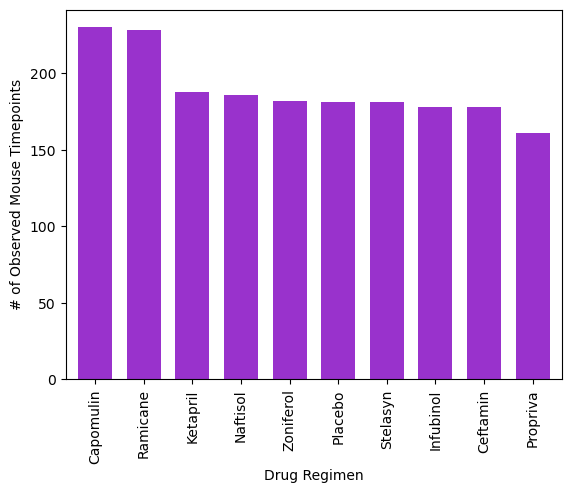

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = merged_df['Drug Regimen'].value_counts()
ax = counts.plot(kind='bar', color='darkorchid', width=0.7)
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('# of Observed Mouse Timepoints')

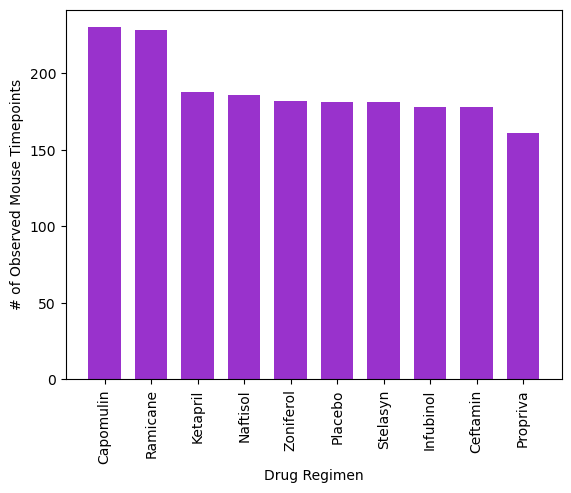

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = merged_df['Drug Regimen'].value_counts()
plt.bar(counts.index, counts.values, color='darkorchid', width=0.7)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

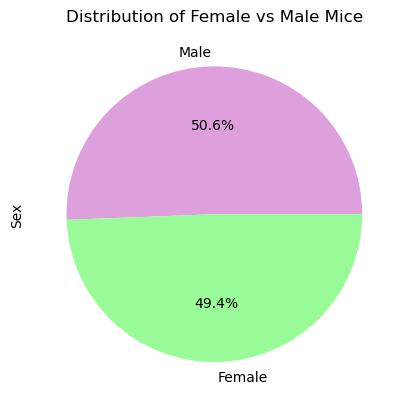

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = merged_df['Sex'].value_counts()
ax = counts.plot(kind='pie',
                autopct='%1.1f%%', colors=["plum", "palegreen"])
ax.set_ylabel('Sex')
plt.title('Distribution of Female vs Male Mice')
plt.show()

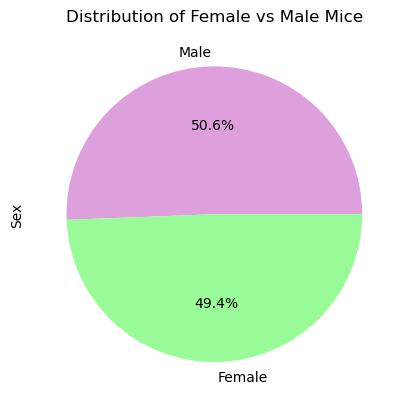

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = merged_df['Sex'].value_counts()
plt.pie(counts, labels=counts.index,
       autopct='%1.1f%%', colors=["plum", "palegreen"])
plt.ylabel('Sex')
plt.title('Distribution of Female vs Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_df = merged_df[merged_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
grouped_df = filtered_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(grouped_df, merged_df, on=['Mouse ID', 'Timepoint'], how='left')

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset
    tumor_vol_data.append(subset)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = subset.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    
    # Print results
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


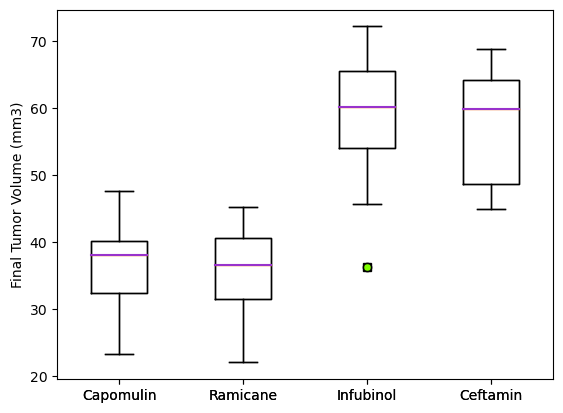

In [45]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, labels=treatments, flierprops = dict(marker = "s", markerfacecolor = "chartreuse"))
ax1.boxplot(tumor_vol_data, labels=treatments, medianprops = dict(color = "darkorchid", linewidth = 1.5))
plt.show()

## Line and Scatter Plots

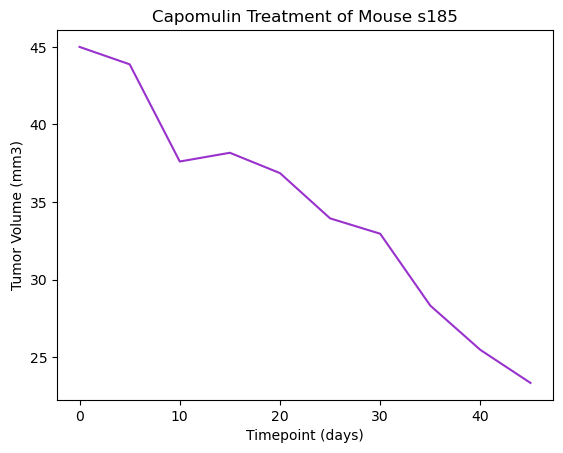

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

# Select a single mouse
mouse_id = capomulin_df['Mouse ID'].iloc[0]

# Filter the data to only include the rows that contain the selected mouse
mouse_df = capomulin_df[capomulin_df['Mouse ID'] == mouse_id]

# Create the line plot
plt.plot(mouse_df['Timepoint'],
        mouse_df['Tumor Volume (mm3)'],
        color="darkorchid")
plt.title(f'Capomulin Treatment of Mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


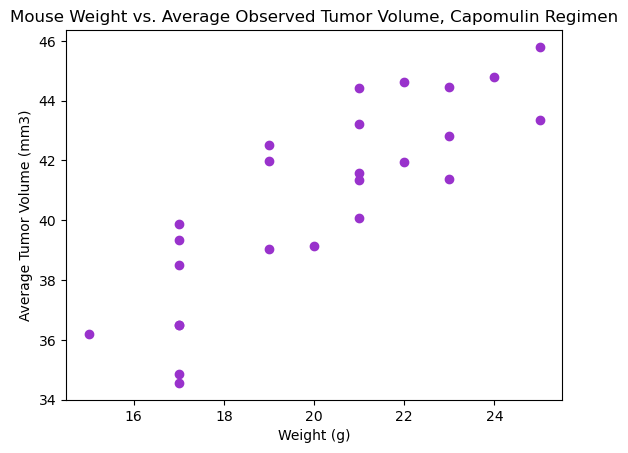

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

# Group the data by Mouse ID and find the average tumor volume for Mouse ID
grouped_df = capomulin_df.groupby('Mouse ID').agg({'Tumor Volume (mm3)':
                                                  'mean',
                                                  'Weight (g)': 'first'})

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(grouped_df['Weight (g)'],
           grouped_df['Tumor Volume (mm3)'],
           color="darkorchid")
plt.title('Mouse Weight vs. Average Observed Tumor Volume, Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The Correlation between mouse weight and average tumor volume is 0.8419363424694722
The linear regression equation is y = 0.9544396890241049x + 21.552160532685008


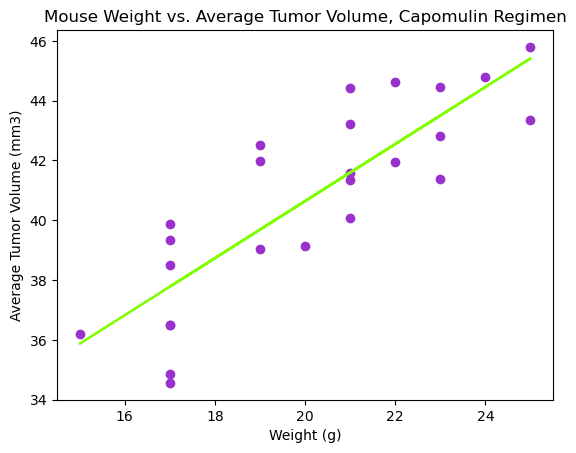

In [42]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

# Filter the data to only include Capomulin rows
capomulin_df = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

# Group the data by Mouse ID and calculate the average tumor volume for each Mouse ID
grouped_df = capomulin_df.groupby('Mouse ID').agg({'Tumor Volume (mm3)':
                                               'mean',
                                               'Weight (g)': 'first'})

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = grouped_df['Weight (g)'].corr(grouped_df['Tumor Volume (mm3)'])
print(f"The Correlation between mouse weight and average tumor volume is {correlation}")

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(grouped_df['Weight (g)'],
                                                       grouped_df['Tumor Volume (mm3)'])
regress_values = grouped_df['Weight (g)'] * slope + intercept
print(f"The linear regression equation is y = {slope}x + {intercept}")

# Create a scatter plot of mouse weight vs. average tumor volume for the Capomulin regimen
plt.scatter(grouped_df['Weight (g)'],
           grouped_df['Tumor Volume (mm3)'],
           color="darkorchid")
plt.plot(grouped_df['Weight (g)'],
        regress_values, color="chartreuse")
plt.title('Mouse Weight vs. Average Tumor Volume, Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()